In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Notice that the dataset has been split into train on and test already

In [5]:
Titanic_dataset = pd.read_csv("titanic_train.csv")

In [6]:
# lets first visualize the data we are working with in a table
Titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

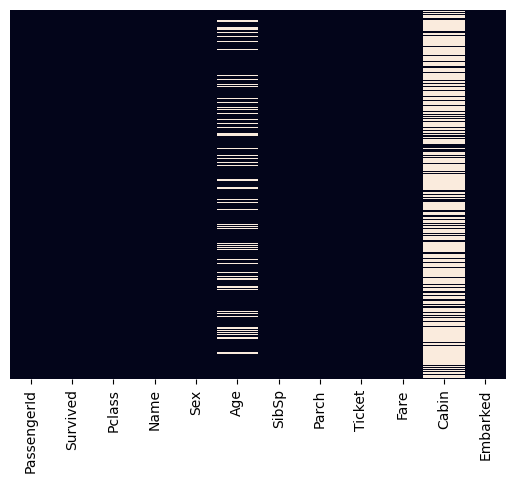

In [7]:
# from a quick overview we see that there are some null values. This hinders our ability to make good predictions
# We can use a heatmap to also visualize where these null values are
sns.heatmap(data=Titanic_dataset.isnull(), yticklabels=False, cbar=False)

In [ ]:
# We can see that most of the Cabin values are null values. We also see that a good amount of the age data is null values
# For the Age data I think it would be best to utilize imputations. This is where we replace all null values with the mean ages

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

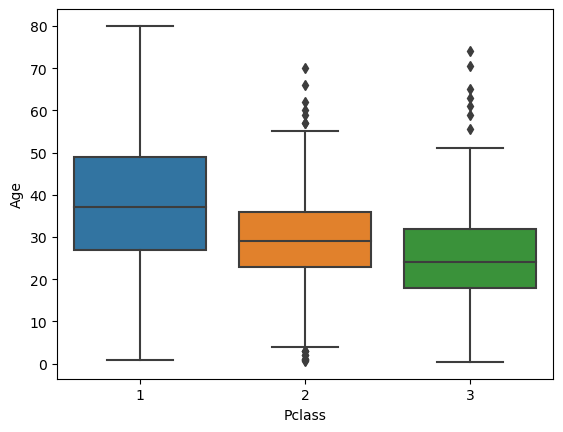

In [10]:
# This helps to see the average age at each class
sns.boxplot(data=Titanic_dataset, x='Pclass', y='Age')

In [11]:
# This function will be applied to the age colomn using the ,apply method hence no iteration
# we check what class the data object is in and if the age datapoint is null we return the average age
def impose_Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if (pd.isnull(Age)):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        Age
    

In [14]:
#Now we need to update the age column using this function
# We set the age column = to the changed value
# we put the age and pclass as the parameters for cols 
# the apply method takes in the function and the axis to work on in this case 1 which represnets column
Titanic_dataset['Age'] = Titanic_dataset[['Age', 'Pclass']].apply(impose_Age, axis=1)